In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
import scipy
import matplotlib.pyplot as plt
from tqdm import tqdm
pd.set_option('display.max_columns', 500)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Reading data

In [3]:
df = pd.read_csv('listings_summary.csv')
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Ian,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,96%,NaN,t,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,2018-11-07,118,2016-04-11,2018-10-28,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,NaN,Within walking distance you'll find the S-Bahn...,Außer deinem Zimmer kannst du noch die Küche u...,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/97d4f6e8-1...,NaN,2986,https://www.airbnb.com/users/show/2986,Michael,2008-09-16,"Berlin, Berlin, Germany",Living with my wife in Berlin. Like travellin...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/50434955-1...,https://a0.muscache.com/im/pictures/50434955-1...,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.548513,13.404553,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$0.00,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,2018-11-07,6,2018-07-04,2018-10-01,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,NaN,f,f,flexible,f,f,1,1.42


In [4]:
columns_to_keep = ['id','host_has_profile_pic','host_since','neighbourhood_cleansed', 'neighbourhood_group_cleansed',
                   'host_is_superhost','description',
                   'latitude', 'longitude','is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms',  
                   'bedrooms', 'bed_type', 'amenities', 'price', 'cleaning_fee',
                   'review_scores_rating','reviews_per_month','number_of_reviews',
                   'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                   'review_scores_communication','review_scores_location','review_scores_value',
                   'security_deposit', 'extra_people', 'guests_included', 'minimum_nights',  
                   'instant_bookable', 'is_business_travel_ready', 'cancellation_policy','availability_365']

df = df[columns_to_keep].set_index('id')
df.head(2)

,host_has_profile_pic,host_since,neighbourhood_cleansed,neighbourhood_group_cleansed,host_is_superhost,description,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,amenities,price,cleaning_fee,review_scores_rating,reviews_per_month,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,security_deposit,extra_people,guests_included,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,availability_365
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,t,2008-08-18,Brunnenstr. Süd,Mitte,t,Great location! 30 of 75 sq meters. This wood...,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",$60.00,$30.00,93.0,3.76,118,10.0,9.0,10.0,10.0,10.0,9.0,$200.00,$28.00,1,4,f,f,strict_14_with_grace_period,141
2695,t,2008-09-16,Prenzlauer Berg Nordwest,Pankow,f,In the summertime we are spending most of our ...,52.548513,13.404553,t,Apartment,Private room,2,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",$17.00,$0.00,100.0,1.42,6,10.0,10.0,10.0,10.0,10.0,10.0,$0.00,$0.00,1,2,f,f,flexible,0


# Null Values
### Inspection + Handling

In [5]:
df.isnull().sum()

host_has_profile_pic              26
host_since                        26
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
host_is_superhost                 26
description                      203
latitude                           0
longitude                          0
is_location_exact                  0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         32
bedrooms                          18
bed_type                           0
amenities                          0
price                              0
cleaning_fee                    7146
review_scores_rating            4389
reviews_per_month               3914
number_of_reviews                  0
review_scores_accuracy          4414
review_scores_cleanliness       4411
review_scores_checkin           4432
review_scores_communication     4418
review_scores_location          4431
review_scores_value             4435
s

# f/t to int

In [6]:
df['is_location_exact'] = df['is_location_exact'].map({'f':0,'t':1})
df['host_is_superhost'] = df['host_is_superhost'].map({'f':0,'t':1})
df['is_business_travel_ready'] = df['is_business_travel_ready'].map({'f':0,'t':1})
df['instant_bookable'] = df['instant_bookable'].map({'f':0,'t':1})


In [7]:
df.head(3)

,host_has_profile_pic,host_since,neighbourhood_cleansed,neighbourhood_group_cleansed,host_is_superhost,description,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,amenities,price,cleaning_fee,review_scores_rating,reviews_per_month,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,security_deposit,extra_people,guests_included,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,availability_365
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,t,2008-08-18,Brunnenstr. Süd,Mitte,1.0,Great location! 30 of 75 sq meters. This wood...,52.534537,13.402557,0,Guesthouse,Entire home/apt,3,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",$60.00,$30.00,93.0,3.76,118,10.0,9.0,10.0,10.0,10.0,9.0,$200.00,$28.00,1,4,0,0,strict_14_with_grace_period,141
2695,t,2008-09-16,Prenzlauer Berg Nordwest,Pankow,0.0,In the summertime we are spending most of our ...,52.548513,13.404553,1,Apartment,Private room,2,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",$17.00,$0.00,100.0,1.42,6,10.0,10.0,10.0,10.0,10.0,10.0,$0.00,$0.00,1,2,0,0,flexible,0
3176,t,2008-10-19,Prenzlauer Berg Südwest,Pankow,0.0,This beautiful first floor apartment is situa...,52.534996,13.417579,1,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",$90.00,$50.00,92.0,1.25,143,9.0,9.0,9.0,9.0,10.0,9.0,$200.00,$20.00,2,62,1,0,strict_14_with_grace_period,220


# Profile Pics

In [8]:
set(df['host_has_profile_pic'])

{'f', nan, 't'}

In [9]:
df['host_has_profile_pic'].fillna('f',inplace=True)

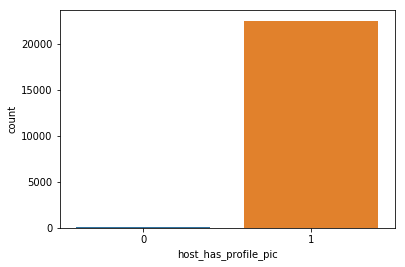

In [10]:
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'f':0,'t':1})
sns.countplot(x='host_has_profile_pic',data=df)

In [11]:
df['host_has_profile_pic'].value_counts()

1    22470
0       82
Name: host_has_profile_pic, dtype: int64

# Price

In [12]:
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
df['cleaning_fee'] = df['cleaning_fee'].str.replace('$', '').str.replace(',', '').astype(float)
df['security_deposit'] = df['security_deposit'].str.replace('$', '').str.replace(',', '').astype(float)
df['extra_people'] = df['extra_people'].str.replace('$', '').str.replace(',', '').astype(float)

In [13]:
df['cleaning_fee'].fillna(df['cleaning_fee'].median(), inplace=True)
df['cleaning_fee'].isna().sum()

0

In [14]:
df['security_deposit'].fillna(df['security_deposit'].median(), inplace=True)
df['security_deposit'].isna().sum()

0

In [15]:
df['price'].describe()

count    22552.000000
mean        67.143668
std        220.266210
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

In [16]:
set1=set(i for i in df[(df['price']==0)].index.tolist())
len(set1)

8

In [17]:
df = df.drop(list(set1))
df.reset_index(inplace=True)
df['price'] = np.log1p(df['price'])

/home/priyanshu/anaconda3/envs/gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness: 1.149665
Kurtosis: 5.184078


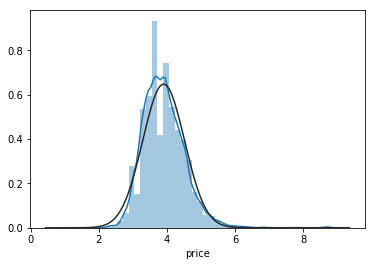

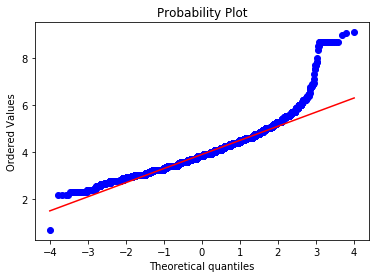

In [18]:
sns.distplot(df['price'], fit=norm);
fig = plt.figure()
res = scipy.stats.probplot(df['price'], plot=plt)
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

# Room Types

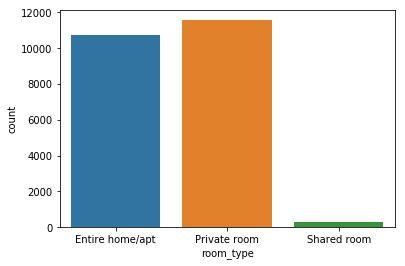

In [19]:
sns.countplot(x='room_type',data=df)

# Neighbourhood Group

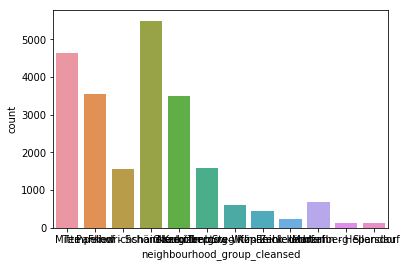

In [20]:
sns.countplot(x='neighbourhood_group_cleansed',data=df)

# Neighbourhood

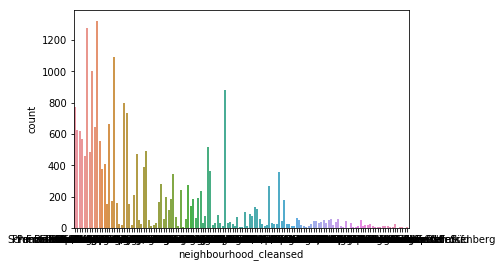

In [21]:
sns.countplot(x='neighbourhood_cleansed',data=df)

In [22]:
z = df['neighbourhood_cleansed'].value_counts()

In [23]:
others = []
for i in set(df['neighbourhood_cleansed']):
    if z[i]<100:
        others.append(i)
len(others)

90

In [24]:
for i in tqdm(range(len(df))):
    if df.loc[i,'neighbourhood_cleansed'] in others:
        df.loc[i,'neighbourhood_cleansed'] = 'Others'

100%|██████████| 22544/22544 [00:02<00:00, 10412.96it/s]


## Propery Type

In [25]:
z = df['property_type'].value_counts()

In [26]:
others = []
for i in set(df['property_type']):
    if z[i]<100:
        others.append(i)
len(others)

27

In [27]:
for i in tqdm(range(len(df))):
    if df.loc[i,'neighbourhood_cleansed'] in others:
        df.loc[i,'neighbourhood_cleansed'] = 'Others'

100%|██████████| 22544/22544 [00:00<00:00, 118378.53it/s]


In [28]:
for i in tqdm(range(len(df))):
    if df.loc[i,'neighbourhood_cleansed'] in others:
        df.loc[i,'neighbourhood_cleansed'] = 'Others'

100%|██████████| 22544/22544 [00:00<00:00, 127802.91it/s]


# Bathrooms

In [29]:
df['bathrooms'].value_counts()

1.0    19801
2.0     1268
1.5     1145
0.5      104
2.5       74
3.0       50
0.0       41
4.0       12
3.5        3
8.5        3
7.0        3
7.5        2
5.0        2
8.0        2
4.5        1
6.0        1
Name: bathrooms, dtype: int64

In [30]:
df['bathrooms'].fillna(1,inplace=True)

# Bedroom

In [31]:
df['bedrooms'].value_counts()

1.0     17159
2.0      2970
0.0      1477
3.0       723
4.0       143
5.0        34
6.0        10
8.0         4
7.0         3
10.0        1
9.0         1
12.0        1
Name: bedrooms, dtype: int64

In [32]:
df['bedrooms'].fillna(1,inplace=True)

# Host Details

In [33]:
type(list(set(df['host_since']))[0])

float

In [34]:
set2=[]
z = df['host_since'].isnull()
for i in range(len(z)):
    if z.loc[i]==True:
        set2.append(i)
z = df['host_is_superhost'].isnull()
for i in range(len(z)):
    if z.loc[i]==True:
        set2.append(i)
set2 = set(set2)
len(set2)

26

In [35]:
df = df.drop(list(set2))
df.reset_index(inplace=True)

# Reviews

In [36]:
dropped = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
            'review_scores_communication','review_scores_location','review_scores_value']
df.drop(dropped,axis=1,inplace=True)

In [37]:
df.head(2)

,index,id,host_has_profile_pic,host_since,neighbourhood_cleansed,neighbourhood_group_cleansed,host_is_superhost,description,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,amenities,price,cleaning_fee,reviews_per_month,number_of_reviews,security_deposit,extra_people,guests_included,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,availability_365
0,0,2015,1,2008-08-18,Brunnenstr. Süd,Mitte,1.0,Great location! 30 of 75 sq meters. This wood...,52.534537,13.402557,0,Guesthouse,Entire home/apt,3,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",4.110874,30.0,3.76,118,200.0,28.0,1,4,0,0,strict_14_with_grace_period,141
1,1,2695,1,2008-09-16,Prenzlauer Berg Nordwest,Pankow,0.0,In the summertime we are spending most of our ...,52.548513,13.404553,1,Apartment,Private room,2,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",2.890372,0.0,1.42,6,0.0,0.0,1,2,0,0,flexible,0


# Cancellation

In [38]:
df['cancellation_policy'].value_counts()

flexible                       9082
moderate                       7086
strict_14_with_grace_period    6283
super_strict_30                  53
super_strict_60                  14
Name: cancellation_policy, dtype: int64

# Dropping features

In [39]:
y = df['price']
df.drop(['price'],axis=1,inplace=True)

In [40]:
df.isnull().sum()

index                              0
id                                 0
host_has_profile_pic               0
host_since                         0
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
host_is_superhost                  0
description                      203
latitude                           0
longitude                          0
is_location_exact                  0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                          0
bedrooms                           0
bed_type                           0
amenities                          0
cleaning_fee                       0
reviews_per_month               3901
number_of_reviews                  0
security_deposit                   0
extra_people                       0
guests_included                    0
minimum_nights                     0
instant_bookable                   0
is_business_travel_ready           0
c

In [41]:
df.head(2)

,index,id,host_has_profile_pic,host_since,neighbourhood_cleansed,neighbourhood_group_cleansed,host_is_superhost,description,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,amenities,cleaning_fee,reviews_per_month,number_of_reviews,security_deposit,extra_people,guests_included,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,availability_365
0,0,2015,1,2008-08-18,Brunnenstr. Süd,Mitte,1.0,Great location! 30 of 75 sq meters. This wood...,52.534537,13.402557,0,Guesthouse,Entire home/apt,3,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",30.0,3.76,118,200.0,28.0,1,4,0,0,strict_14_with_grace_period,141
1,1,2695,1,2008-09-16,Prenzlauer Berg Nordwest,Pankow,0.0,In the summertime we are spending most of our ...,52.548513,13.404553,1,Apartment,Private room,2,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",0.0,1.42,6,0.0,0.0,1,2,0,0,flexible,0


## Size estimation

In [42]:
df['size'] = df['description'].str.extract('(\d{2,3}\s?[smSM])', expand=True)
df['size'] = df['size'].str.replace("\D", "")
df['size'] = df['size'].astype(float)


In [43]:
sub_df = df[['accommodates', 'bathrooms', 'bedrooms', 'cleaning_fee', 
                 'security_deposit', 'extra_people', 'guests_included', 'size']]

In [44]:
train_data = sub_df[sub_df['size'].notnull()]
test_data  = sub_df[sub_df['size'].isnull()]

X_train = train_data.drop('size', axis=1)
X_test  = test_data.drop('size', axis=1)

y_train = train_data['size']

In [45]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
y_test = linreg.predict(X_test)

In [47]:
mse(y_train,linreg.predict(X_train)),r2_score(y_train,linreg.predict(X_train))


(13096.0716179402, 0.027247629309170796)

In [48]:
y_test = pd.DataFrame(y_test)
y_test.columns = ['size']

In [49]:
prelim_index = pd.DataFrame(X_test.index)
prelim_index.columns = ['prelim']

y_test = pd.concat([y_test, prelim_index], axis=1)
y_test.set_index(['prelim'], inplace=True)


In [50]:
new_test_data = pd.concat([X_test, y_test], axis=1)
sub_df_new = pd.concat([new_test_data, train_data], axis=0)
df = pd.concat([sub_df_new, df], axis=1)

In [51]:
sub_df_new.columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'cleaning_fee',
       'security_deposit', 'extra_people', 'guests_included', 'size'],
      dtype='object')

In [52]:
df.drop(['size'],axis=1,inplace=True)

In [53]:
df.head(3)

,accommodates,bathrooms,bedrooms,cleaning_fee,security_deposit,extra_people,guests_included,index,id,host_has_profile_pic,host_since,neighbourhood_cleansed,neighbourhood_group_cleansed,host_is_superhost,description,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,amenities,cleaning_fee,reviews_per_month,number_of_reviews,security_deposit,extra_people,guests_included,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,availability_365
0,3,1.0,1.0,30.0,200.0,28.0,1,0,2015,1,2008-08-18,Brunnenstr. Süd,Mitte,1.0,Great location! 30 of 75 sq meters. This wood...,52.534537,13.402557,0,Guesthouse,Entire home/apt,3,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",30.0,3.76,118,200.0,28.0,1,4,0,0,strict_14_with_grace_period,141
1,2,1.0,1.0,0.0,0.0,0.0,1,1,2695,1,2008-09-16,Prenzlauer Berg Nordwest,Pankow,0.0,In the summertime we are spending most of our ...,52.548513,13.404553,1,Apartment,Private room,2,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",0.0,1.42,6,0.0,0.0,1,2,0,0,flexible,0
2,4,1.0,1.0,50.0,200.0,20.0,2,2,3176,1,2008-10-19,Prenzlauer Berg Südwest,Pankow,0.0,This beautiful first floor apartment is situa...,52.534996,13.417579,1,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",50.0,1.25,143,200.0,20.0,2,62,1,0,strict_14_with_grace_period,220


In [54]:
dropped = ['index','id','description']
df.drop(dropped,axis=1,inplace=True)

# Data processing

In [55]:
for i in tqdm(range(len(df))):
    df.loc[i,'No_of_amentities'] = len(df.loc[i,'amenities'].split(','))

100%|██████████| 22518/22518 [05:20<00:00, 66.64it/s]


In [56]:
df['Laptop_friendly_workspace'] = df['amenities'].str.contains('Laptop friendly workspace')
df['TV'] = df['amenities'].str.contains('TV')
df['Family_kid_friendly'] = df['amenities'].str.contains('Family/kid friendly')
df['Host_greets_you'] = df['amenities'].str.contains('Host greets you')
df['Smoking_allowed'] = df['amenities'].str.contains('Smoking allowed')
df['Hot_water'] = df['amenities'].str.contains('Hot water')
df['Fridge'] = df['amenities'].str.contains('Refrigerator')


In [57]:
df.head(2)

,accommodates,bathrooms,bedrooms,cleaning_fee,security_deposit,extra_people,guests_included,host_has_profile_pic,host_since,neighbourhood_cleansed,neighbourhood_group_cleansed,host_is_superhost,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,amenities,cleaning_fee,reviews_per_month,number_of_reviews,security_deposit,extra_people,guests_included,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,availability_365,No_of_amentities,Laptop_friendly_workspace,TV,Family_kid_friendly,Host_greets_you,Smoking_allowed,Hot_water,Fridge
0,3,1.0,1.0,30.0,200.0,28.0,1,1,2008-08-18,Brunnenstr. Süd,Mitte,1.0,52.534537,13.402557,0,Guesthouse,Entire home/apt,3,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",30.0,3.76,118,200.0,28.0,1,4,0,0,strict_14_with_grace_period,141,29.0,True,True,True,False,False,True,True
1,2,1.0,1.0,0.0,0.0,0.0,1,1,2008-09-16,Prenzlauer Berg Nordwest,Pankow,0.0,52.548513,13.404553,1,Apartment,Private room,2,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",0.0,1.42,6,0.0,0.0,1,2,0,0,flexible,0,10.0,True,False,False,False,False,False,False


In [58]:
dropped = ['amenities']
df.drop(dropped,axis=1,inplace=True)

In [59]:
category = ['neighbourhood_cleansed','neighbourhood_group_cleansed','property_type','room_type',
           'bed_type','cancellation_policy']

for i in category:
    df[i] = df[i].astype('category')
    
df["neighbourhood_cleansed"] = df["neighbourhood_cleansed"].astype('category')
df["neighbourhood_group_cleansed"] = df["neighbourhood_group_cleansed"].astype('category')
df["room_type"] = df["room_type"].astype('category')


In [ ]:
# for i in category:
#     df[i] = df[i].cat.codes

# # df['room_type'] = df['room_type'].cat.codes
# # df['neighbourhood'] = df['neighbourhood'].cat.codes
# # df['neighbourhood_group'] = df['neighbourhood_group'].cat.codes

# Feature Engineering

### Duration

In [60]:
from dateutil import parser

def diff_date(row):
    today = parser.parse('2018-11-7')
    return ((today - parser.parse(row['host_since'])).days)/365.25


In [61]:
df['host_since'] = df.apply(diff_date,axis=1)
df['host_since'].describe()

count    22518.000000
mean         3.686432
std          1.909644
min          0.002738
25%          2.335387
50%          3.529090
75%          5.059548
max         10.220397
Name: host_since, dtype: float64

### Distances

In [62]:
from math import sin, cos, sqrt, atan2, radians
def haversine_distance_central(row):
    berlin_lat,berlin_long = radians(52.5200), radians(13.4050)
    R = 6373.0
    long = radians(row['longitude'])
    lat = radians(row['latitude'])
    
    dlon = long - berlin_long
    dlat = lat - berlin_lat
    a = sin(dlat / 2)**2 + cos(lat) * cos(berlin_lat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

In [63]:
def haversine_distance_airport(row):
    berlin_lat,berlin_long = radians(52.3733), radians(13.5064)
    R = 6373.0
    long = radians(row['longitude'])
    lat = radians(row['latitude'])
    
    dlon = long - berlin_long
    dlat = lat - berlin_lat
    a = sin(dlat / 2)**2 + cos(lat) * cos(berlin_lat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

In [64]:
def haversine_distance_rail(row):
    berlin_lat,berlin_long = radians(52.5073), radians(13.3324)
    R = 6373.0
    long = radians(row['longitude'])
    lat = radians(row['latitude'])
    
    dlon = long - berlin_long
    dlat = lat - berlin_lat
    a = sin(dlat / 2)**2 + cos(lat) * cos(berlin_lat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

In [65]:
df['distance_central'] = df.apply(haversine_distance_central,axis=1)
df['distance_airport'] = df.apply(haversine_distance_airport,axis=1)
df['distance_railways'] = df.apply(haversine_distance_airport,axis=1)
df['distance_avg'] = ( df['distance_central'] + df['distance_airport'] + df['distance_railways'] )/3.0

In [66]:
df['distance_avg'].describe()

count    22518.000000
mean        12.906814
std          2.477341
min          7.061769
25%         10.997052
50%         12.419055
75%         14.433595
max         28.173038
Name: distance_avg, dtype: float64

In [67]:
df.head()

,accommodates,bathrooms,bedrooms,cleaning_fee,security_deposit,extra_people,guests_included,host_has_profile_pic,host_since,neighbourhood_cleansed,neighbourhood_group_cleansed,host_is_superhost,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,cleaning_fee,reviews_per_month,number_of_reviews,security_deposit,extra_people,guests_included,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,availability_365,No_of_amentities,Laptop_friendly_workspace,TV,Family_kid_friendly,Host_greets_you,Smoking_allowed,Hot_water,Fridge,distance_central,distance_airport,distance_railways,distance_avg
0,3,1.0,1.0,30.0,200.0,28.0,1,1,10.220397,Brunnenstr. Süd,Mitte,1.0,52.534537,13.402557,0,Guesthouse,Entire home/apt,3,1.0,1.0,Real Bed,30.0,3.76,118,200.0,28.0,1,4,0,0,strict_14_with_grace_period,141,29.0,True,True,True,False,False,True,True,1.625414,19.266232,19.266232,13.385959
1,2,1.0,1.0,0.0,0.0,0.0,1,1,10.140999,Prenzlauer Berg Nordwest,Pankow,0.0,52.548513,13.404553,1,Apartment,Private room,2,1.0,1.0,Real Bed,0.0,1.42,6,0.0,0.0,1,2,0,0,flexible,0,10.0,True,False,False,False,False,False,False,3.171617,20.675116,20.675116,14.840616
2,4,1.0,1.0,50.0,200.0,20.0,2,1,10.050650,Prenzlauer Berg Südwest,Pankow,0.0,52.534996,13.417579,1,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,50.0,1.25,143,200.0,20.0,2,62,1,0,strict_14_with_grace_period,220,19.0,True,False,True,False,False,False,False,1.872657,18.966373,18.966373,13.268467
3,2,1.0,1.0,30.0,250.0,18.0,1,1,9.998631,Schöneberg-Nord,Tempelhof - Schöneberg,0.0,52.498855,13.349065,1,Apartment,Private room,2,1.0,1.0,Pull-out Sofa,30.0,0.39,25,250.0,18.0,1,5,0,0,strict_14_with_grace_period,297,29.0,True,False,False,True,False,True,False,4.457682,17.574477,17.574477,13.202212
4,2,1.0,1.0,0.0,0.0,24.0,1,1,9.478439,Helmholtzplatz,Pankow,1.0,52.543157,13.415091,1,Apartment,Private room,2,1.0,1.0,Real Bed,0.0,1.75,197,0.0,24.0,1,2,0,0,moderate,26,13.0,True,False,True,False,False,True,False,2.664743,19.880937,19.880937,14.142206


In [68]:
i=20
for i in df.columns[i:i+1]:
    print(i,set(df[i]))

bed_type {'Airbed', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Couch'}


In [69]:
for c in category:
    df[c+'_freq'] = df[c].map(df.groupby(c).size() / df.shape[0])
    indexer = pd.factorize(df[c], sort=True)[1]
    df[c] = indexer.get_indexer(df[c])

In [70]:
df.head(3)

,accommodates,bathrooms,bedrooms,cleaning_fee,security_deposit,extra_people,guests_included,host_has_profile_pic,host_since,neighbourhood_cleansed,neighbourhood_group_cleansed,host_is_superhost,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,cleaning_fee,reviews_per_month,number_of_reviews,security_deposit,extra_people,guests_included,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,availability_365,No_of_amentities,Laptop_friendly_workspace,TV,Family_kid_friendly,Host_greets_you,Smoking_allowed,Hot_water,Fridge,distance_central,distance_airport,distance_railways,distance_avg,neighbourhood_cleansed_freq,neighbourhood_group_cleansed_freq,property_type_freq,room_type_freq,bed_type_freq,cancellation_policy_freq
0,3,1.0,1.0,30.0,200.0,28.0,1,1,10.220397,5,4,1.0,52.534537,13.402557,0,16,0,3,1.0,1.0,4,30.0,3.76,118,200.0,28.0,1,4,0,0,2,141,29.0,True,True,True,False,False,True,True,1.625414,19.266232,19.266232,13.385959,0.034328,0.205347,0.002531,0.475442,0.965183,0.279021
1,2,1.0,1.0,0.0,0.0,0.0,1,1,10.140999,27,6,0.0,52.548513,13.404553,1,1,1,2,1.0,1.0,4,0.0,1.42,6,0.0,0.0,1,2,0,0,0,0,10.0,True,False,False,False,False,False,False,3.171617,20.675116,20.675116,14.840616,0.027622,0.157119,0.896838,0.511413,0.965183,0.403322
2,4,1.0,1.0,50.0,200.0,20.0,2,1,10.050650,30,6,0.0,52.534996,13.417579,1,1,0,4,1.0,1.0,4,50.0,1.25,143,200.0,20.0,2,62,1,0,2,220,19.0,True,False,True,False,False,False,False,1.872657,18.966373,18.966373,13.268467,0.027445,0.157119,0.896838,0.475442,0.965183,0.279021


In [75]:
df.isna().sum()

accommodates                         0
bathrooms                            0
bedrooms                             0
cleaning_fee                         0
security_deposit                     0
extra_people                         0
guests_included                      0
host_has_profile_pic                 0
host_since                           0
neighbourhood_cleansed               0
neighbourhood_group_cleansed         0
host_is_superhost                    0
latitude                             0
longitude                            0
is_location_exact                    0
property_type                        0
room_type                            0
accommodates                         0
bathrooms                            0
bedrooms                             0
bed_type                             0
cleaning_fee                         0
reviews_per_month                    0
number_of_reviews                    0
security_deposit                     0
extra_people             

In [74]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].median())

In [76]:
df.to_csv('X_new.csv',index=False)

In [78]:
y.to_csv('Y_new.csv',index=False)

/home/priyanshu/anaconda3/envs/gpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [143]:
df.columns.value_counts()

security_deposit                     2
bathrooms                            2
extra_people                         2
guests_included                      2
bedrooms                             2
accommodates                         2
cleaning_fee                         2
number_of_reviews                    1
is_business_travel_ready             1
property_type_freq                   1
distance_airport                     1
availability_365                     1
Host_greets_you                      1
distance_avg                         1
latitude                             1
neighbourhood_group_cleansed         1
reviews_per_month                    1
host_since                           1
property_type                        1
cancellation_policy                  1
TV                                   1
Smoking_allowed                      1
Family_kid_friendly                  1
neighbourhood_cleansed_freq          1
bed_type_freq                        1
distance_central         

In [142]:
dropped = ['security_deposit','bathrooms','extra_people','guests_included','bedrooms accommodates','cleaning_fee']                         
df.drop(dropped,axis=1,inplace=True)

KeyError: "['security_deposit' 'bathrooms' 'extra_people' 'guests_included'\n 'bedrooms accommodates' 'cleaning_fee'] not found in axis"

 # Model

In [122]:
X_train, X_val , y_train, y_val = train_test_split(df,y,test_size=0.3)

In [123]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_val)

/home/priyanshu/anaconda3/envs/gpu/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/priyanshu/anaconda3/envs/gpu/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/priyanshu/anaconda3/envs/gpu/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[-0.42139088, -0.28265707, -0.25016823, ..., -0.21934361,
         0.18942465, -0.44513827],
       [-0.42139088, -0.28265707, -0.25016823, ...,  0.41353844,
         0.18942465, -1.07721043],
       [-1.08018507, -0.28265707, -0.25016823, ...,  0.41353844,
         0.18942465, -0.44513827],
       ...,
       [-0.42139088, -0.28265707, -0.25016823, ...,  0.41353844,
         0.18942465,  1.12599004],
       [-0.42139088, -0.28265707, -0.25016823, ...,  0.41353844,
         0.18942465,  1.12599004],
       [-0.42139088,  2.79522945, -0.25016823, ...,  0.41353844,
         0.18942465,  1.12599004]])

## Linear Regression

In [124]:
model = Lasso(alpha=1e-6)

In [125]:
model.fit(X_train,y_train)

/home/priyanshu/anaconda3/envs/gpu/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [126]:
train_rmse =(r2_score(y_train, model.predict(X_train)))
test_rmse =(r2_score(y_val, model.predict(X_val)))
print('Train error= ',train_rmse)
print('Test error= ',test_rmse)


Train error=  0.5144153501973632
Test error=  0.4955299963008566


In [127]:
for i in range(len(model.coef_)):
    print(df.columns[i],' ',model.coef_[i])

accommodates   0.1722531245747418
bathrooms   0.062211880958429416
bedrooms   0.0756028017438623
cleaning_fee   0.0028507523743841095
security_deposit   4.832069595678884e-05
extra_people   -0.0020645204554967673
guests_included   0.026090493128369353
host_has_profile_pic   0.043634006270576835
host_since   0.00043197078356978973
neighbourhood_cleansed   -0.00019115624738905813
neighbourhood_group_cleansed   -0.0032479352084755463
host_is_superhost   0.06203263572010189
latitude   -9.315373701014023
longitude   1.6636611078790187
is_location_exact   -0.024592979804275248
property_type   0.002377453887566345
room_type   -0.38911788909377504
accommodates   -0.08712316729115309
bathrooms   0.006579423186743425
bedrooms   0.020370753653786298
bed_type   0.006084159547693912
cleaning_fee   -0.001171223532105738
reviews_per_month   0.0007207801610800863
number_of_reviews   -0.0010428866899225278
security_deposit   -2.9219839326795422e-05
extra_people   0.0023992032835124548
guests_included  

## LightGBM

In [128]:
# for i in range(len(X_train.columns)):
#     print(i,' ',X_train.columns[i])

In [129]:
import lightgbm as lgbm
params = {'objective': 'regression',
          'metric': 'rmse',
          'learning_rate':0.005,
          'max_depth':5
         } 
train_set = lgbm.Dataset(X_train,y_train, silent=True)
model = lgbm.train(params, train_set=train_set,num_boost_round=1000,categorical_feature=[9,10,15,16,20,30])

/home/priyanshu/anaconda3/envs/gpu/lib/python3.6/site-packages/lightgbm/basic.py:1190: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [9, 10, 15, 16, 20, 30]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


In [130]:
yp_train = model.predict(X_train)
yp_val = model.predict(X_val)

In [131]:
train_r2 =(r2_score(y_train, yp_train))
test_r2 =(r2_score(y_val, yp_val))
    
print('Train error= ',train_r2)
print('Test error= ',test_r2)


Train error=  0.6909573280050317
Test error=  0.6457348035030834


In [132]:
train_rmse =(mse(y_train, yp_train))
test_rmse =(mse(y_val, yp_val))
    
print('Train error= ',train_rmse)
print('Test error= ',test_rmse)


Train error=  0.11480391761918422
Test error=  0.13915505886041404


In [119]:
def adj_r2(r2,n,p):
    return 1- ((1-r2)*(n-1))/(n-p-1)

In [120]:
adj_r2(train_r2,X_train.shape[0],X_train.shape[1])

0.693922011874266

In [121]:
adj_r2(test_r2,X_val.shape[0],X_val.shape[1])

0.6386444288791526